## Parte A - Palabras más frecuentes, ley de Zipf

### Parte 1

Para esta parte se pide, para cada texto, tokenizarlos, calcular las frecuencias y ordenarlos.

En primer lugar se deben importar e instalar las librerías correspondientes del siguiente bloque de código:

In [1]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

A continuación se presentan dos funciones. La primera, `tokenize_text`, que utiliza la función `word_tokenize` de nltk para tokenizar el texto de un archivo cuyo path se pasa por parámetro.

In [2]:
from nltk.tokenize import word_tokenize

def tokenize_text(text_path):
    with open(text_path, 'r') as text:
        return word_tokenize(text.read())

La segunda, `get_frecuencies`, que utiliza la clase `FreqDist` de nltk para obtener las frecuencias de cada palabra. Luego se ordenan dichas frecuencias de forma descendente.

In [3]:
from nltk.probability import FreqDist

def get_frecuencies(tokenized_text):
    return FreqDist(word.lower() for word in tokenized_text)

Utilizando las dos funciones anteriores se obtiene, para cada autor, una lista con los textos tokenizados y ordenados de forma descendente. Se imprimen los 10 primeros elementos de cada lista:

In [4]:
import pprint

authors = ['L1-Conrad', 'L2-Zola', 'L3-Proust', 'L4-Austen', 'L5-Flaubert']
frecuencies = {}

for i, author in enumerate(authors):
    tokenized_text = tokenize_text(f'textos/ConAutor/{author}.txt')
    frecuency_values = sorted([x for x in get_frecuencies(tokenized_text).values()], reverse=True)
    frecuencies[author] = frecuency_values

pprint.pprint([fv[:10] for fv in frecuencies.values()])

[[6049, 5437, 5320, 3243, 2392, 2364, 2187, 2043, 1758, 1621],
 [10673, 6581, 6302, 4347, 3426, 3222, 2770, 2685, 2234, 2161],
 [21114, 13428, 9996, 8117, 7129, 6417, 5874, 4992, 4923, 3726],
 [9115, 8583, 8457, 6240, 5253, 4909, 4634, 3503, 3295, 3055],
 [13213, 8758, 8533, 4970, 3756, 3609, 3269, 3236, 3148, 2677]]


### Parte 2

#### Ley de Zipf

La Ley de Zipf [1] propone que, dado un corpus de texto, hay una relación matemática aproximada entre la frecuencia de ocurrencia de cada palabra, y el rango de cada una de ellas en la lista de todas las palabras usadas en el texto ordenada de forma descendente según la frecuencia. El rango corresponde a la posición de la palabra en dicha lista.

Sea un identificador *s* para cada palabra que corresponde a su rango, y *f(s)* la frecuencia relativa de ocurrencias de dicha palabra, entonces la Ley de Zipf propone que la siguiente relación se mantiene de forma aproximada:

$f(s) = \frac{A}{s^x}$

donde el exponente *x* toma un valor ligeramente mayor a 1, y *A* es una constante utilizada para normalizar.

Esto implica que el segundo elemento se repetirá aproximadamente con una frecuencia de 1/2 de la del primero, el tercer elemento con una frecuencia de 1/3 del primero y así sucesivamente.

#### Corrección de Zipf-Mandelbrot

La Corrección de Zipf-Mandelbrot [1] utiliza argumentos sobre la estructura fractal de los árboles léxicos. La fórmula génerica descrita por Mandelbrot puede ser escrita de la siguiente forma:

$f(s) = \frac{A}{(1 + C.s)^x}$

donde *C* es un segundo parámetro que requiere ser modificado para ajustarse a los datos.

Ambas leyes son utilizadas en un amplio espectro de ámbitos además de la linguística (medicina, deporte, etc).

#### Gráfica frecuencias vs rango

In [5]:
import matplotlib.pyplot as plt

def plot(data):
    plots = []
    plt.xscale('log')
    plt.yscale('log')
    for tokens_ranges, frecuencies, label in data:
        plots.append(plt.plot(tokens_ranges, frecuencies, label=label)[0])

    plt.legend(handles=plots)
    plt.show()

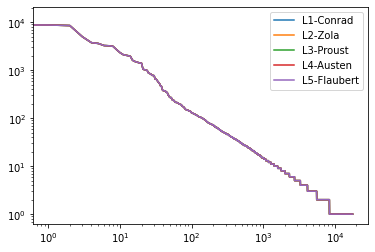

In [6]:
plots = []
for i, text in enumerate(authors):
    plots.append((list(range(len(frecuency_values))), frecuency_values, authors[i]))

plot(plots)

### Parte 3

#### Palabras con una aparición

A continuación, se listan las frecuencias absolutas y relativas de las palabras que aparecen una única vez en cada libro.

In [7]:
import pandas as pd

absolute_frecuencies = []
relative_frecuencies = []

for author_frecuencies in frecuencies.values():
    count = len(list(filter(lambda x: x == 1, author_frecuencies)))
    absolute_frecuencies.append(count)
    relative_frecuencies.append("{0:.2f}".format(count/len(author_frecuencies)))

table = {
    'absolute_frecuencies': absolute_frecuencies,
    'relative_frecuencies': relative_frecuencies
}
dfObj = pd.DataFrame.from_dict(table, orient='index', columns=authors) 
print(dfObj)

                     L1-Conrad L2-Zola L3-Proust L4-Austen L5-Flaubert
absolute_frecuencies      7258    7516     11656      7405        9298
relative_frecuencies      0.57    0.51      0.54      0.52        0.53


## Parte B - Distancia Delta entre textos


Inicialmente generamos el conjunto de funciones necesarias para el modelo delta.

In [8]:
import statistics

def Fij(j,i,ocurr_texts):    
    return ocurr_texts[j][i]

def Dj(j,ocurr_texts):
    sum=0
    for i in range(150):
        sum+=Fij(j,i,ocurr_texts)
    return sum
    

def FRij(j,i,ocurr_texts):
    return Fij(j,i,ocurr_texts)/Dj(j,ocurr_texts)


def media(i,ocurr_texts):
    FR=[]
    for j in range(5):
        FR.append(FRij(j,i,ocurr_texts))
    return statistics.mean(FR)
    
    

def desviacioni(i,ocurr_texts):
    FR=[]
    for j in range(5):
        FR.append(FRij(j,i,ocurr_texts))
    return statistics.stdev(FR)


def Zij(j,i,ocurr_texts):
    if desviacioni(i,ocurr_texts)==0: return 0
    else: return (FRij(j,i,ocurr_texts)-media(i,ocurr_texts))/desviacioni(i,ocurr_texts)


Luego para el procesamiento de los textos, generamos dos listas, una con los textos con autores que nos interesa perfilar y otra con los textos a determinar su ator.

In [9]:
from collections import Counter
import numpy as np
import re
import pandas as pd


L=[]
L.append(open("textos/ConAutor/L1-Conrad.txt", "r",encoding="latin_1").read())
L.append(open("textos/ConAutor/L2-Zola.txt", "r",encoding="latin_1").read())
L.append(open("textos/ConAutor/L3-Proust.txt", "r",encoding="latin_1").read())
L.append(open("textos/ConAutor/L4-Austen.txt", "r",encoding="latin_1").read())
L.append(open("textos/ConAutor/L5-Flaubert.txt", "r",encoding="latin_1").read())

T=[]
T.append(open("textos/SinAutor/T1.txt", "r",encoding="latin_1").read())
T.append(open("textos/SinAutor/T2.txt", "r",encoding="latin_1").read())
T.append(open("textos/SinAutor/T3.txt", "r",encoding="latin_1").read())
T.append(open("textos/SinAutor/T4.txt", "r",encoding="latin_1").read())
T.append(open("textos/SinAutor/T5.txt", "r",encoding="latin_1").read())

Se necesitaba determinar las 150 palabras mas comunes en la coleccion de textos con autor y para esto utilizamos la libreria llamda collections que contiene una funcion llamada Counter, la cual utilizamos para determinar la cantdad de ocurrencias de cada palabra y asi obetenr las 150 mas usadas.

Luego hacemos una pequeña limpieza en el texto, eliminando los caracteres '\n' y las puntuaciones.
Por ultimo decidimos ordenar estas palabras alfabeticamente.

In [10]:
#data_set is the colleccion
#i is a word (string) in the colleccion
#j in a authorn (int) j=0 -> L1 , j=1 -> L2, j=2 -> L3, j=3 -> L4, j=4 -> L5

data_set = L[0]+L[1]+L[2]+L[3]+L[4]
text = re.sub('([\W_]+)|(\n)', ' ',data_set.lower())
split_it = text.split()
counter = Counter(split_it)
most_occur = counter.most_common(150)
new_list = [ seq[0] for seq in most_occur ]
order_vector=sorted(new_list)
#order_vector has the n word most commun

Para determinar las ocurrencias de estas 150 palabras conocidas en cada texto de autor, generamos una lista ocurr_texts que tiene 5 posiciones y en doden cada posocion corresponde a un autor conocido.

Dentro de cada posicion de la lista ocurr_texts guardamos otra lista que contiene, en el mismo orden alfabetico que fue determinado arriba la cantidad de ocurrencias de cada palabra de interes para cada autor.

In [11]:
ocurr_texts=[]
#List that contains the vector ocurrences for each author

for i in range(5):
    l = [0] * 150
    text = re.sub('([\W_]+)|(\n)', ' ',L[i].lower())
    split_it = text.split()
    counter = Counter(split_it)
    for i,elem in enumerate(order_vector):
        if elem in counter.keys():
            l[i]=(counter[elem])
    ocurr_texts.append(l)
 

A continuacion perfilamos a los autores utilizando las funciones definidas para el modelo delta.

In [12]:
profile_conrad= [0] * 150
profile_zola= [0] * 150
profile_proust= [0] * 150
profile_austen= [0] * 150
profile_flaubert= [0] * 150

#Profiling authors
for i in range(150):
    profile_conrad[i] = Zij(0,i,ocurr_texts)
    profile_zola[i] = Zij(1,i,ocurr_texts)
    profile_proust[i] = Zij(2,i,ocurr_texts)
    profile_austen[i] = Zij(3,i,ocurr_texts)
    profile_flaubert[i] = Zij(4,i,ocurr_texts)


Repetimos los mismos pasos para los textos T1,T2,T3,T4 y T5.

In [13]:
ocurr_texts_without_author=[]
#List that contains the vector ocurrences for each instance without author

for i in range(5):
    t = [0] * 150
    text = re.sub('([\W_]+)|(\n)', ' ',T[i].lower())
    split_it = text.split()
    counter = Counter(split_it)
    for i,elem in enumerate(order_vector):
        if elem in counter.keys():
            t[i]=(counter[elem])
    ocurr_texts_without_author.append(t)

#Calculate best author
profile_t1= [0] * 150
profile_t2= [0] * 150
profile_t3= [0] * 150
profile_t4= [0] * 150
profile_t5= [0] * 150

#Profiling instance without author
for i in range(150):
    profile_t1[i] = Zij(0,i,ocurr_texts_without_author)
    profile_t2[i] = Zij(1,i,ocurr_texts_without_author)
    profile_t3[i] = Zij(2,i,ocurr_texts_without_author)
    profile_t4[i] = Zij(3,i,ocurr_texts_without_author)
    profile_t5[i] = Zij(4,i,ocurr_texts_without_author)
    

Por ultimo para la evaluacion, creamos una funcion que calcula la dinstancia de manhattan para dos vectores y generamos una tabla con los resultaos.

In [14]:
def distancia_manhattan(x,y):
    sum=0
    for i in range(150):
        dist=abs(x[i]-y[i])
        sum+=dist
    return sum

In [15]:
#Evaluation
distances_conrad=[distancia_manhattan(profile_conrad,profile_t1),distancia_manhattan(profile_conrad,profile_t2),distancia_manhattan(profile_conrad,profile_t3),distancia_manhattan(profile_conrad,profile_t4),distancia_manhattan(profile_conrad,profile_t5)]
distances_zola=[distancia_manhattan(profile_zola,profile_t1),distancia_manhattan(profile_zola,profile_t2),distancia_manhattan(profile_zola,profile_t3),distancia_manhattan(profile_zola,profile_t4),distancia_manhattan(profile_zola,profile_t5)]
distances_proust=[distancia_manhattan(profile_proust,profile_t1),distancia_manhattan(profile_proust,profile_t2),distancia_manhattan(profile_proust,profile_t3),distancia_manhattan(profile_proust,profile_t4),distancia_manhattan(profile_proust,profile_t5)]
distances_austen=[distancia_manhattan(profile_austen,profile_t1),distancia_manhattan(profile_austen,profile_t2),distancia_manhattan(profile_austen,profile_t3),distancia_manhattan(profile_austen,profile_t4),distancia_manhattan(profile_austen,profile_t5)]
distances_flauber=[distancia_manhattan(profile_flaubert,profile_t1),distancia_manhattan(profile_flaubert,profile_t2),distancia_manhattan(profile_flaubert,profile_t3),distancia_manhattan(profile_flaubert,profile_t4),distancia_manhattan(profile_flaubert,profile_t5)]

a = np.array([distances_conrad,distances_zola,distances_proust,distances_austen,distances_flauber])
df=pd.DataFrame(a,columns=['conrad','zola','proust','austen','flauber'],index=['T1','T2','T3','T4','T5'])
print(df)

        conrad        zola      proust      austen     flauber
T1  110.736950  159.047728  179.274339  170.176775  146.176080
T2  169.606863   93.010435  162.126623  202.635320  111.804623
T3  144.133734  185.893669   66.798071  166.736314  165.427579
T4  152.786246  211.529657  181.007531   82.746270  194.193266
T5  173.910190  116.585892  175.894724  177.692387   85.322346


Entonces para simplificar las clasificaciones para nuestras instancias a determinar son:

In [16]:
def most_close(conrad,zola,proust,austen,flaubert,x):
    dist=[]
    dist.append(distancia_manhattan(conrad,x))
    dist.append(distancia_manhattan(zola,x))
    dist.append(distancia_manhattan(proust,x))
    dist.append(distancia_manhattan(austen,x))
    dist.append(distancia_manhattan(flaubert,x))
    if dist.index(min(dist)) == 0:
        return 'Conrad'
    elif dist.index(min(dist)) == 1:
        return 'Zola'
    elif dist.index(min(dist)) == 2:
        return 'Proust'
    elif dist.index(min(dist)) == 3:
        return 'Austen'
    elif dist.index(min(dist)) == 4:
        return 'Flauber'
    else:
        return 'none'

In [17]:
print('For the instance t1,most close:')
print(most_close(profile_conrad,profile_zola,profile_proust,profile_austen,profile_flaubert,profile_t1))

print('For the instance t2,most close:')
print(most_close(profile_conrad,profile_zola,profile_proust,profile_austen,profile_flaubert,profile_t2))

print('For the instance t3,most close:')
print(most_close(profile_conrad,profile_zola,profile_proust,profile_austen,profile_flaubert,profile_t3))

print('For the instance t4,most close:')
print(most_close(profile_conrad,profile_zola,profile_proust,profile_austen,profile_flaubert,profile_t4))

print('For the instance t5,most close:')
print(most_close(profile_conrad,profile_zola,profile_proust,profile_austen,profile_flaubert,profile_t5))


For the instance t1,most close:
Conrad
For the instance t2,most close:
Zola
For the instance t3,most close:
Proust
For the instance t4,most close:
Austen
For the instance t5,most close:
Flauber


## Parte C - Atribución de autoría con Aprendizaje Automático

En esta última sección se decidió probar con distintos enfoques para analizar el problema de la atribución de autoría, los cuales detallaremos a continuación, mostrando los resultados obtenidos y las métricas utilizadas para evaluar cada modelo.

#### Modelo redes neuronales

Nos resultó interesante comenzar el análisis utilizando algunos modelos conocidos de redes neuronales, partiendo de modelos simples y entrando también en algunos más sofisticados como son redes neuronales LSTM, Bideccionales, Convolucionales, etc.  

Este análisis puede verse como un puntapié inicial de experimentación, ya que no detallaremos a fondo los resultados obtenidos utilizando redes neuronales, simplemente planteamos un acercamiento a las mismas, para luego resaltar los otros enfoques utilizados y mostrar los resultados obtenidos para los mismos.

Cada modelo fue entrenado con el 80% de los datos fragmentadas provistos para esta sección, formando cada instancia con el texto de un fragmento y su autor, siendo los mismos valores en el rango de 0 a 4.

Luego de establecidas tanto las instancias de entrenamiento como las de prueba, se trabajó con los modelos de redes mencionados. Cada modelo de redes neuronales contiene capas distintas, y utilizada distintos parámetros como son las épocas, batchs, cantidad de neuronas de capas ocultas, etc.

Detallamos a continuación los 5 modelos de redes utilizados y los correspondientes hiperparámetros correspondiente a cada modelo:

* **Modelo Simple:** *Cantidad de épocas.*
* **Modelo LSTM:** *Cantidad de épocas, tamaño "batches", cantidad neuronas capa LSTM y porcentaje dropout.* 
* **Modelo LSTM con capa SpartialDropout1D:** *Cantidad de épocas, tamaño "batches", cantidad neuronas capa LSTM y porcentaje dropout.*
* **Modelo LSTM bidireccional:** *Cantidad de épocas, tamaño "batches", cantidad neuronas capa LSTM y porcentaje dropout.*
* **Modelo Convolucional:** *Cantidad de épocas, tamaño "batches", cantidad neuronas capa Conv1D y porcentaje dropout.*

Todos los modelos coinciden en 2 aspectos centrales, que son el de tener una primer capa de Embeddings, y una capa final con 5 neuronas de salida, correspondientes a las posibles clases de los autores. 

Para formar la capa de embeddings, inicialmente se tokeniza el texto de cada instancia y se genera una matriz de embeddings donde por cada palabra del vocabulario encontrada se coloca su vector de embeddings como columna de la matriz, para luego ser utilizada como primer capa de cada red.

Para trabajar con embeddings se utilizó "fasttext", librería que provee vectores para una cantidad considerable de palabras en español.

In [18]:
%run ./parte_3_redes/main.py

[nltk_data] Downloading package punkt to /home/ale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


train dataset

                                             Paragraph  Author
0    Prefacio del autor\nEl origen de El agente sec...       0
1    Las sugerencias para ciertos personajes del re...       0
2    Ocurrió que Mr. Verloc estaba dispuesto a hace...       0
3    —Tengo aquí algunos de sus informes —dijo el f...       0
4    —¡Agente! —dijo Mr. Verloc, sin más esfuerzo q...       0
..                                                 ...     ...
515  Y de nuevo corrió hacia el capitán.\nÉste regr...       4
516  Luego, cien pasos más adelante, volvió a deten...       4
517  Al ver a Emma, pareció aliviado de un gran pes...       4
518  Con muchos recuerdos.\nVuestro padre que os qu...       4
519  Lo cual no impidió que, cinco días más tarde, ...       4

[520 rows x 2 columns]
Loaded 13082 word vectors.


2021-07-30 20:46:33.165424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-30 20:46:33.165485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-07-30 20:46:40.366673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-30 20:46:40.366699: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-30 20:46:40.366719: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ale-VivoBook-S15-X510UF): /proc/driver/nvidia/version does not exist
2021-07-30 20:46:40.366949: I tensorflow/core/platfor

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20632, 300)        17325300  
_________________________________________________________________
flatten (Flatten)            (None, 6189600)           0         
_________________________________________________________________
dense (Dense)                (None, 5)                 30948005  
Total params: 48,273,305
Trainable params: 30,948,005
Non-trainable params: 17,325,300
_________________________________________________________________
None


2021-07-30 20:46:41.280476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-30 20:46:41.305283: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1999965000 Hz


Epoch 1/5


2021-07-30 20:46:51.077442: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 792268800 exceeds 10% of free system memory.


 1/17 [>.............................] - ETA: 2:52 - loss: 1.6019 - sparse_categorical_accuracy: 0.2812

2021-07-30 20:46:52.151070: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 792268800 exceeds 10% of free system memory.


 2/17 [==>...........................] - ETA: 10s - loss: 5.1000 - sparse_categorical_accuracy: 0.2812 

2021-07-30 20:46:52.859006: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 792268800 exceeds 10% of free system memory.


 3/17 [====>.........................] - ETA: 9s - loss: 7.1209 - sparse_categorical_accuracy: 0.2639 

2021-07-30 20:46:53.477564: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 792268800 exceeds 10% of free system memory.


 4/17 [======>.......................] - ETA: 8s - loss: 8.2205 - sparse_categorical_accuracy: 0.2604

2021-07-30 20:46:54.127849: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 792268800 exceeds 10% of free system memory.


17/17 [==============================] - 21s 630ms/step - loss: 9.6707 - sparse_categorical_accuracy: 0.2628
Epoch 2/5
17/17 [==============================] - 10s 570ms/step - loss: 0.2392 - sparse_categorical_accuracy: 0.9399
Epoch 3/5
17/17 [==============================] - 9s 540ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9696
Epoch 4/5
17/17 [==============================] - 8s 497ms/step - loss: 3.2624e-04 - sparse_categorical_accuracy: 1.0000
Epoch 5/5
17/17 [==============================] - 9s 505ms/step - loss: 1.8144e-04 - sparse_categorical_accuracy: 1.0000
val files..
4/4 [==============================] - 1s 184ms/step - loss: 2.3384 - sparse_categorical_accuracy: 0.4560


Para este enfoque de redes neuronales, trabajamos con la métrica "sparse_categorical_accuracy", provista por los modelos de keras utilizados.

No entraremos en detalles de los resultados obtenidos con cada modelo, ya que para utilizar estas redes, hace falta poner foco en la validación de cada hiperparámetro posible, para así seleccionar los valores adecuados e inicializar cada modelo de manera correcta, tarea que habitualmente conlleva un tiempo considerable.

A continuación detallaremos los otros enfoques implementados, con sus correspondientes resultados obtenidos.

#### Modelo bag of words

En primer lugar debemos importar e instalar las librerías correspondientes del siguiente bloque de código:

In [19]:
import nltk

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ale/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

En este enfoque también se utilizo el 80% de los datos como instancias de entrenamiento, y el 20% restante como dataset de test.

En primer lugar se definen y utilizan un par de parámetros y de funciones auxiliares para leer los archivos y transformarlos en instancias con sus respectivas clases:

In [20]:
import nltk
import os
import re

def read_dataset_files(dataset_path):
    all_texts_with_classes = []
    filenames = []
    for filename in os.listdir(dataset_path):
        filenames.append(filename)
        file_path = dataset_path + filename
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='latin-1') as file:
                text = file.read()
                author = re.search("\D+(?=\d+\.txt)", filename).group(0)
                all_texts_with_classes.append((text, author))
    return all_texts_with_classes, filenames

def extract(texts_with_classes):
    all_texts = [t[0] for t in texts_with_classes]
    classes = [t[1] for t in texts_with_classes]
    all_text = "".join([t[0] for t in texts_with_classes])
    all_tokens = nltk.word_tokenize(all_text)
    return all_texts, classes, all_tokens


TRAINING_PROPORTION = 0.8
DATASET_PATH = "dataset/"

all_texts_with_classes, _ = read_dataset_files(DATASET_PATH)
training_texts = all_texts_with_classes[:int(TRAINING_PROPORTION * len(all_texts_with_classes))]
all_texts, classes, all_tokens = extract(training_texts)


Se extrae cada palabra de las instancias como token, y se utiliza la librería "nltk.FreqDist" para contar las ocurrencias de cada token y posteriormente seleccionar los más frecuentes. 

Posteriormente con la librería "CountVectorizer" de sklearn, se construye una matriz en la que se indica para cada token, la cantidad de ocurrencias del mismo en cada instancia del dataset de entrenamiento.

In [21]:
import nltk
import numpy as np

from typing import OrderedDict
from sklearn.feature_extraction.text import CountVectorizer

TOP_WORDS_BOW = 150


def get_bow_features(tokens, texts, top_words_amount=TOP_WORDS_BOW, normalize=False):
    fdist = nltk.FreqDist(tokens)
    vocab = [v[0] for v in sorted(fdist.items(), key=lambda x: x[1], reverse=True)][:top_words_amount]
    vectorizer = CountVectorizer(vocabulary=vocab, tokenizer=nltk.word_tokenize)
    fvs_bow = vectorizer.fit_transform(texts).toarray().astype(np.float64)
    if normalize:
        fvs_bow = normalize_features(fvs_bow)
    return fvs_bow
  
def normalize_features(features):
    return features / np.c_[np.apply_along_axis(np.linalg.norm, 1, features)]


fvs = OrderedDict()
bow = get_bow_features(all_tokens, all_texts)
print(bow)
fvs['bow'] = normalize_features(bow)

[[144. 122.  99. ...   1.   0.   0.]
 [115.  84.  96. ...   2.   0.   0.]
 [151. 113. 104. ...   4.   1.   1.]
 ...
 [197.  97.  72. ...   4.   0.   0.]
 [199. 110.  73. ...   1.   1.   3.]
 [138. 136. 101. ...   3.   0.   2.]]


#### Modelo pos tagging

Para trabajar con este enfoque se realiza el mismo preprocesamiento de datos mencionado en los enfoques anteriores, tomando el 80% del dataset como datos de entrenamiento.

Posteriormente se establece un conjunto de tags de "part of speech", y para cada texto del dataset, se genera un vector que indica cuantas ocurrencias del tag se encuentran en cada instancia.

In [ ]:
import nltk

from typing import OrderedDict


def get_pos_features(texts, normalize=False):
    texts_pos = [[p[1] for p in nltk.pos_tag(nltk.word_tokenize(text))] for text in texts]
    pos_list = ['NN', 'NNP', 'DT', 'IN', 'JJ', 'NNS']
    fvs_syntax = np.array([[text.count(pos) for pos in pos_list] for text in texts_pos]).astype(np.float64)
    if normalize:
        fvs_syntax = normalize_features(fvs_syntax)
    return fvs_syntax  
 
def normalize_features(features):
    return features / np.c_[np.apply_along_axis(np.linalg.norm, 1, features)]


pos = get_pos_features(all_texts)
print(pos)
fvs['pos'] = normalize_features(pos)
fvs['both'] = normalize_features(np.c_[bow, pos])

#### Modelos utilizados, métricas y resultados obtenidos para cada enfoque

Luego, para cada posible representación de instancias en features (bag of words, POS tagging, y ambas funsionadas) se procede a entrenar en base a tres clasificadores distintos, todos provistos por la librería "sklearn". 
Detallamos a continuación los 3 clasificadores utilizados:

* **Clasificador Lineal SVM:** *Clasificador basado en el concepto de Support Vector Machine.*
* **Clasificador Gaussiano Naive Bayes:** *Clasificador probabilístico sencillo fundamentado en el teorema de Bayes, y en base a la probabilidad de una instancia dada a pertenecer a una clase, predice su valor.* 
* **Clasificador KNN:** *Clasificador que calcula los "k" vecinos más cercanos para cada instancia, y en base a la clasificación de sus vecinos, predice la clasificación de la instancia*.

Se presenta a continuación la ejecución de los tres clasificadores mencionados, con los correspondientes resultados obtenidos.

En primer lugar se deben generar las instancias del conjunto de test, en su representación en features. Para esto se utilizan las funciones auxiliares definidas y utilizadas anteriormente para el conjunto de entrenamiento.

In [ ]:
test_texts = all_texts_with_classes[:int((1 - TRAINING_PROPORTION) * len(all_texts_with_classes))]
all_texts_test, test_classes_test, all_tokens_test = extract(test_texts)

fvs_test = OrderedDict()
bow = get_bow_features(all_tokens_test, all_texts_test)
pos = get_pos_features(all_texts_test)
fvs_test['bow'] = normalize_features(bow)
fvs_test['pos'] = normalize_features(pos)
fvs_test['both'] = normalize_features(np.c_[bow, pos])

Finalmente, se realiza el entrenamiento y la predicción de los autores del conjunto de test. Para todos los resultados se utiliza el accuracy como medida.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


def train_and_predict(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    return classifier.score(x_test, y_test)


results = OrderedDict()
for feature_type in fvs.keys():
    results[feature_type] = [
        "{0:.2f}%".format(train_and_predict(LinearSVC(), fvs[feature_type], classes, fvs_test[feature_type], test_classes_test) * 100),
        "{0:.2f}%".format(train_and_predict(GaussianNB(), fvs[feature_type], classes, fvs_test[feature_type], test_classes_test) * 100),
        "{0:.2f}%".format(train_and_predict(KNeighborsClassifier(), fvs[feature_type], classes, fvs_test[feature_type], test_classes_test) * 100)
    ]

dfObj = pd.DataFrame.from_dict(results, orient='index', columns=['SVM', 'NB', 'KNN']) 
print(dfObj)

Como se puede ver en la tabla final de comparaciones, se logran obtener resultados muy buenos.

Como primera conclusión general, se puede decir que Naive Bayes fue el modelo que arrojó peores resultados. Esto podría tener parte de su justificación en el hecho de que dicho modelo asume que existe independencia entre los atributos de las instancias, lo puede hacer que se esté perdiendo información en el caso de nuestras representaciones.

Por otra parte resulta interesante ver que la representación por bag of words es la que realmente empujó a los modelos a obtener resultados buenos.

En dicha representación, cada instancia es representada por un vector con las cantidades de apariciones de las palabras más frecuentes de todo el texto, lo cual es una aplicación práctica del paper de Burrows, 2002.

La representación por POS tags no obtuvo muy buenos resultados por sí sola, pero ayudó a mejorar el accuracy al utilizarla en conjunto con la representación por bag of words en un 5% aproximadamente para el caso de KNN, llegando a un valor de **97.66%**.

## Conculsiones

## Referencias

1. Ley de Zipf y corrección de Zipf-Mandelbrot http://statweb.stanford.edu/~owen/courses/306a/ZipfAndGutenberg.pdf